In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
la_file = "Resources/la.csv"

In [7]:
la_file_df = pd.read_csv(la_file, delimiter = ", ")
la_file_df[["Year", "Month", "Day"]]=la_file_df["date"].str.split("/", n=2, expand=True)
la_file_df.drop(columns=["date"], inplace=True)
la_file_df["Year"]=la_file_df["Year"].astype(int)
la_file_df["Month"]=la_file_df["Month"].astype(int)
#la_file_df=la_file_df[la_file_df["Year"]>2016]
la_file_df=la_file_df[la_file_df["Month"]<8]
bins_df = la_file_df.dropna(subset = ['pm25'])
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,pm25,pm10,o3,no2,so2,co,Year,Month,Day
0,50.0,22.0,39.0,6.0,NaN,1.0,2020,7,2
1,44.0,26.0,45.0,9.0,1,2.0,2020,7,3
2,49.0,65.0,43.0,13.0,1,3.0,2020,7,4
3,96.0,104.0,48.0,11.0,1,3.0,2020,7,5
4,183.0,37.0,52.0,16.0,1,4.0,2020,7,6
...,...,...,...,...,...,...,...,...,...
2285,40.0,33.0,17.0,6.0,NaN,4.0,2014,3,28
2286,53.0,37.0,5.0,4.0,NaN,6.0,2014,3,29
2287,59.0,17.0,4.0,1.0,NaN,3.0,2014,3,30
2288,27.0,25.0,10.0,3.0,NaN,4.0,2014,3,31


In [8]:
bins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 0 to 2289
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    1427 non-null   float64
 1   pm10    1408 non-null   float64
 2   o3      1422 non-null   float64
 3   no2     1424 non-null   float64
 4   so2     350 non-null    object 
 5   co      1419 non-null   float64
 6   Year    1427 non-null   int64  
 7   Month   1427 non-null   int64  
 8   Day     1427 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 111.5+ KB


In [9]:
AQI2017 = []
for value in bins_df["pm25"]:
    if value > 0 and value <= 12:
        AQI2017.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2017.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2017.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2017.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2017.append("invalid")
bins_df["AQI"] = AQI2017
bins_df = bins_df[bins_df["AQI"] != "invalid" ]
bins_df["AQI"] = [round(i) for i in bins_df["AQI"]]
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,pm25,pm10,o3,no2,so2,co,Year,Month,Day,AQI
0,50.0,22.0,39.0,6.0,NaN,1.0,2020,7,2,137
1,44.0,26.0,45.0,9.0,1,2.0,2020,7,3,122
2,49.0,65.0,43.0,13.0,1,3.0,2020,7,4,134
3,96.0,104.0,48.0,11.0,1,3.0,2020,7,5,172
4,183.0,37.0,52.0,16.0,1,4.0,2020,7,6,233
...,...,...,...,...,...,...,...,...,...,...
2285,40.0,33.0,17.0,6.0,NaN,4.0,2014,3,28,112
2286,53.0,37.0,5.0,4.0,NaN,6.0,2014,3,29,144
2287,59.0,17.0,4.0,1.0,NaN,3.0,2014,3,30,153
2288,27.0,25.0,10.0,3.0,NaN,4.0,2014,3,31,82


In [10]:
bins = [0, 50, 100, 150, 200, 300, 500]
quality = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

bins_df["Levels of Concern"]=pd.cut(bins_df["pm25"], bins, labels = quality, include_lowest = True)
bins_df.drop(columns = ["pm25", "pm10", "o3", "no2", "so2", "co"], inplace = True)
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,Day,AQI,Levels of Concern
0,2020,7,2,137,Good
1,2020,7,3,122,Good
2,2020,7,4,134,Good
3,2020,7,5,172,Moderate
4,2020,7,6,233,Unhealthy
...,...,...,...,...,...
2285,2014,3,28,112,Good
2286,2014,3,29,144,Moderate
2287,2014,3,30,153,Moderate
2288,2014,3,31,82,Good


In [11]:
la_agg = bins_df.groupby(["Year","Month"]).agg({"AQI":["min","max","mean"]})
la_months = la_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
la_months

AQI                 
            min  max        mean
Year Month                      
2014 Jan     99  203  154.633333
     Feb     63  351  147.115385
     Mar     82  171  137.322581
     Apr     63  166  143.200000
     May    105  177  149.258065
     June   153  206  162.266667
     Jul    124  190  156.520000
2015 Jan     76  202  139.600000
     Feb     80  199  147.321429
     Mar     68  177  125.178571
     Apr    102  164  145.166667
     May     95  174  142.888889
     June   127  183  154.629630
     Jul     95  171  145.560000
2016 Jan     93  169  136.684211
     Feb     42  179  118.344828
     Mar     72  189  131.419355
     Apr     66  158  123.066667
     May     61  167  124.677419
     June    63  176  149.666667
     Jul    105  160  142.774194
2017 Jan     59  156  112.413793
     Feb     61  157  110.444444
     Mar     74  183  125.612903
     Apr     66  158  115.344828
     May     80  161  136.032258
     June    97  176  148.666667
     Jul    115  174  152.225806
2018 Jan     70  199  141.290323
     Feb     68  179  127.821429
     Mar     66  164  118.838710
     Apr     74  177  143.233333
     May     76  160  134.387097
     June    97  167  150.600000
     Jul     95  166  143.806452
2019 Jan     61  170  114.800000
     Feb     53  155   93.500000
     Mar     68  157  107.451613
     Apr     59  161  125.100000
     May     82  158  117.322581
     June    80  159  139.866667
     Jul    119  172  151.290323
2020 Jan     84  179  134.233333
     Feb     59  162  125.034483
     Mar     57  155   91.806452
     Apr     46  157  107.000000
     May     55  161  124.387097
     June    55  152  112.933333
     Jul     74  233  138.166667

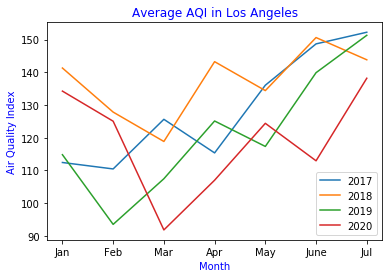

In [12]:
ax1 = la_months["AQI"]["mean"].loc[2017].plot.line(label=2017)
ax2 = la_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
ax3 = la_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
ax4 = la_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Average AQI in Los Angeles", color = "blue")
plt.ylabel("Air Quality Index", color = "blue")
plt.xlabel("Month", color = "blue")
plt.legend()
plt.show()

In [13]:
la_months_df = bins_df.groupby(["Year","Month"]).mean()
#la_months_df.drop(columns=["pm25"])
la_months_df["AQI"] = round(la_months_df["AQI"])
la_months_df

AQI
Year Month       
2014 1      155.0
     2      147.0
     3      137.0
     4      143.0
     5      149.0
     6      162.0
     7      157.0
2015 1      140.0
     2      147.0
     3      125.0
     4      145.0
     5      143.0
     6      155.0
     7      146.0
2016 1      137.0
     2      118.0
     3      131.0
     4      123.0
     5      125.0
     6      150.0
     7      143.0
2017 1      112.0
     2      110.0
     3      126.0
     4      115.0
     5      136.0
     6      149.0
     7      152.0
2018 1      141.0
     2      128.0
     3      119.0
     4      143.0
     5      134.0
     6      151.0
     7      144.0
2019 1      115.0
     2       94.0
     3      107.0
     4      125.0
     5      117.0
     6      140.0
     7      151.0
2020 1      134.0
     2      125.0
     3       92.0
     4      107.0
     5      124.0
     6      113.0
     7      138.0

In [14]:
pwd

'/Users/gagethompson/Desktop/HOMEWORK/project-one'

In [16]:
la_months_df.to_csv("project_one_csv/la_months.csv")